In [363]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
df = pd.read_csv("loan_data.csv")

In [365]:
df.shape

(9578, 14)

In [366]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [368]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [369]:
# Rename label.
new_index = {
    "credit.policy": "accorded", "int.rate": "rate", "log.annual.inc": "log_annual",
    "days.with.cr.line": "cred_days", "revol.bal": "revol_bal", "inq.last.6mths": "inq_last_6mths",
    "delinq.2yrs": "delinq_2yrs", "pub.rec": "pub_rec", "not.fully.paid": "not_fully_paid", 
    "revol.util": "revol_util"
}
df.rename(columns=new_index, inplace=True)

In [370]:
df.head()

,accorded,purpose,rate,installment,log_annual,dti,fico,cred_days,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [371]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=1)

In [372]:
def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

In [373]:
def quantile_norm(df_input):
    sorted_df = pd.DataFrame(np.sort(df_input.values,axis=0), index=df_input.index, columns=df_input.columns)
    mean_df = sorted_df.mean(axis=1)
    mean_df.index = np.arange(1, len(mean_df) + 1)
    quantile_df =df_input.rank(method="min").stack().astype(int).map(mean_df).unstack()
    return quantile_df

In [374]:
df = pd.get_dummies(df)

In [375]:
df.head()

,accorded,rate,installment,log_annual,dti,fico,cred_days,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


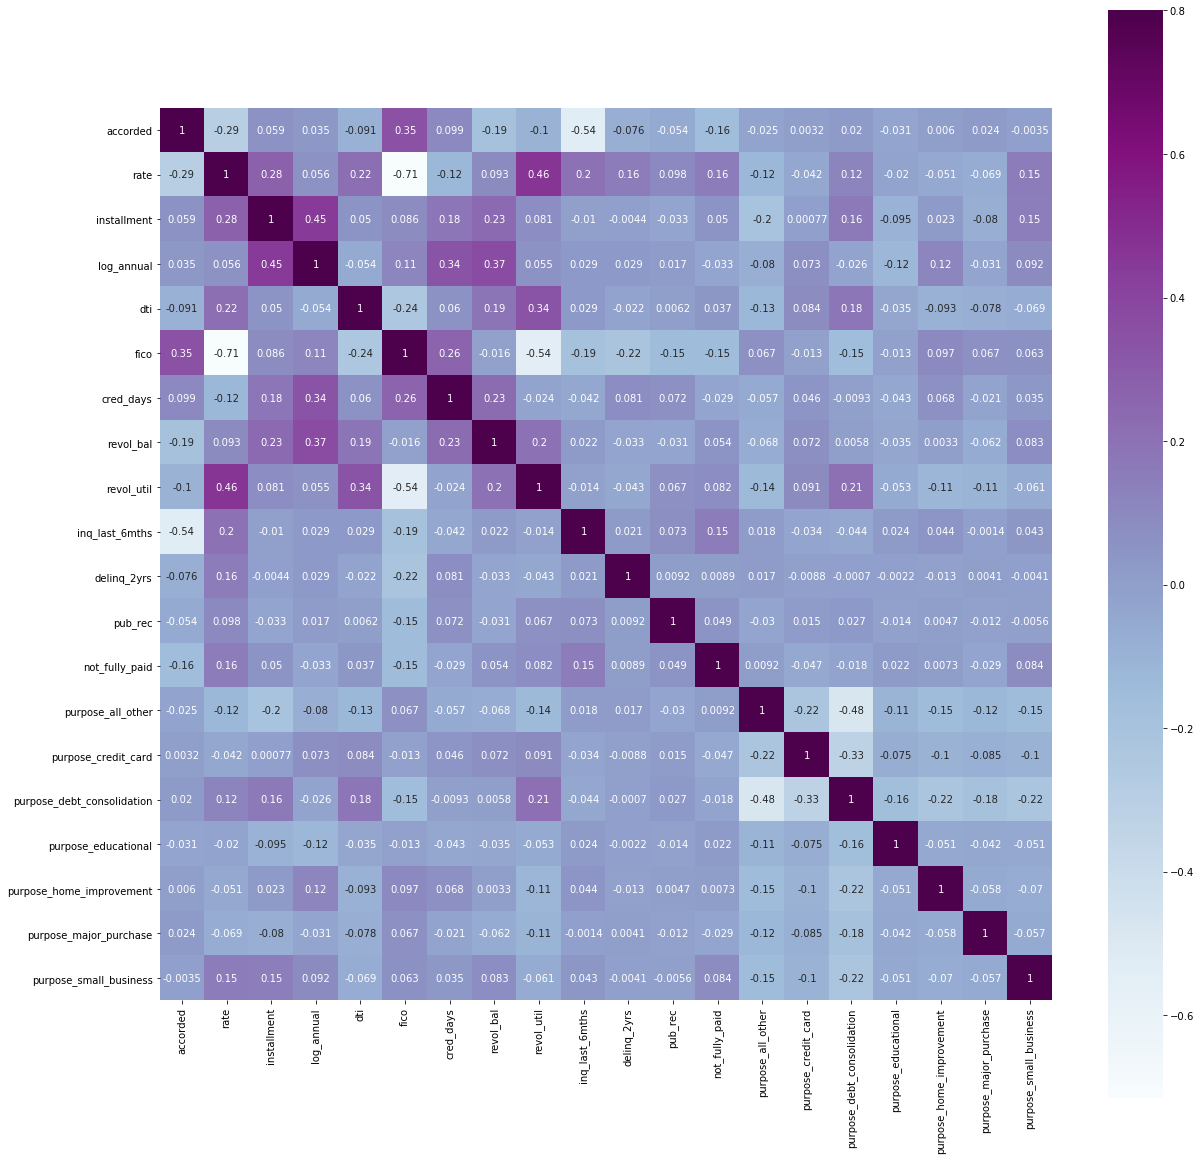

In [376]:
matrix=df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)

In [377]:
df = df.drop(columns=['purpose_credit_card', 'purpose_all_other', 'purpose_debt_consolidation'])

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [379]:
df_quantil = quantile_norm(df)

In [380]:
data = df_quantil

y = df["accorded"]
X = data.drop("accorded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_fold = KFold(10)

In [381]:
model_score = {}

In [382]:
## Regression logistic

In [383]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

score_kfold = cross_val_score(LogisticRegression(), X_train, y_train, cv=k_fold).mean()
model_score["regression_logistic"] = score_test
model_score["k_regression_logistic"] = score_kfold

In [384]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)

score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

model_score["SGDClassifier"] = score_test

In [385]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0)

clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

model_score["LogisticRegressionCV"] = score_test

In [386]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)
score_train = neigh.score(X_train, y_train)
score_test = neigh.score(X_test, y_test)

model_score["KNeighborsClassifier"] = score_test

In [387]:
## Random forest
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [388]:
regr = RandomForestClassifier(max_depth=100, random_state=110, criterion="gini", bootstrap=False, max_features="log2")
regr.fit(X_train, y_train)
model_score["RandomForestClassifier"] = score_test

In [389]:
regr = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=1000, random_state=110, criterion="gini", bootstrap=False, max_features="log2")).fit(X_train, y_train)
model_score["BaggingClassifier (rfc)"] = score_test

In [390]:
from sklearn.ensemble import GradientBoostingClassifier
reg = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
model_score["GradientBoostingClassifier"] = score_test

In [391]:
gb = GradientBoostingClassifier(loss="deviance")
gb.fit(X_train, y_train)
score_test = gb.score(X_test, y_test)
model_score["GradientBoostingClassifier"] = score_test

{'regression_logistic': 0.9112734864300627, 'k_regression_logistic': 0.9035494841044249, 'SGDClassifier': 0.9091858037578288, 'LogisticRegressionCV': 0.9112734864300627, 'KNeighborsClassifier': 0.8950939457202505, 'RandomForestClassifier': 0.8950939457202505, 'BaggingClassifier (rfc)': 0.8950939457202505, 'GradientBoostingClassifier': 0.9900835073068893}


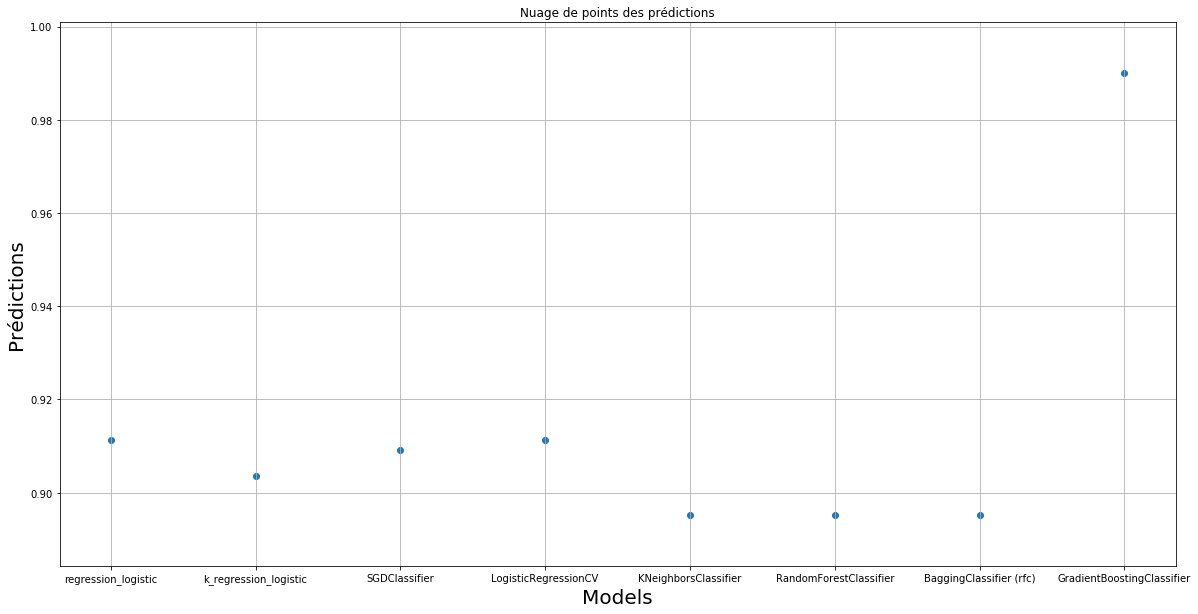

In [398]:
print(model_score)

plt.figure(figsize=(20, 10))

x = [k for k in model_score.keys()]
y = [v for v in model_score.values()]

plt.scatter(x, y)

plt.title('Nuage de points des prédictions')
plt.xlabel('Models', size=20)
plt.ylabel('Prédictions', size=20)

plt.grid(True)

plt.show()